<a href="https://colab.research.google.com/github/mr-ayush-agrawal/DL_Notebooks/blob/main/Lect/EMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## EMA
Expoential Moving Average calulation in python

In [39]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [40]:
# got some random TS data from github
df = pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv')
df.head()

,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


In [41]:
  df.shape

(3650, 2)

In [42]:
# Taking just a part of dataset
df = df.tail(400).reset_index(drop=True)
df.tail()

,Date,Temp
395,1990-12-27,14.0
396,1990-12-28,13.6
397,1990-12-29,13.5
398,1990-12-30,15.7
399,1990-12-31,13.0


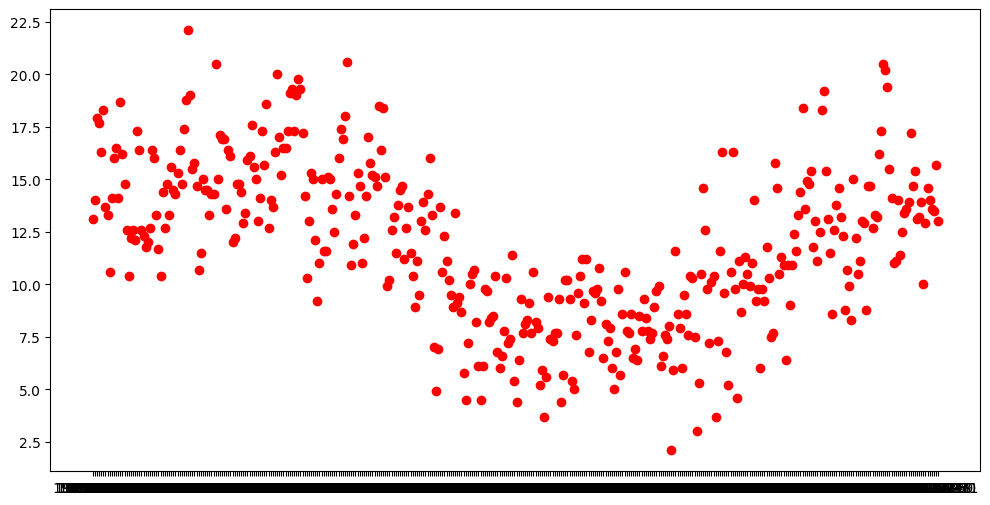

In [43]:
plt.figure(figsize = (12,6))
plt.scatter(df.Date, df.Temp, color = 'red')
plt.show()

In [44]:
x1 = df['Temp'].ewm(alpha = 0.9).mean()

`alpha` parameter is the same parameter what is in notes.

α = 1 - Β

In [45]:
x1

0      13.100000
1      13.918182
2      17.505405
3      17.680558
4      16.438043
         ...    
395    14.040483
396    13.644048
397    13.514405
398    15.481440
399    13.248144
Name: Temp, Length: 400, dtype: float64

In [46]:
df['ema9'] = x1
df

,Date,Temp,ema9
0,1989-11-27,13.1,13.100000
1,1989-11-28,14.0,13.918182
2,1989-11-29,17.9,17.505405
3,1989-11-30,17.7,17.680558
4,1989-12-01,16.3,16.438043
...,...,...,...
395,1990-12-27,14.0,14.040483
396,1990-12-28,13.6,13.644048
397,1990-12-29,13.5,13.514405
398,1990-12-30,15.7,15.481440


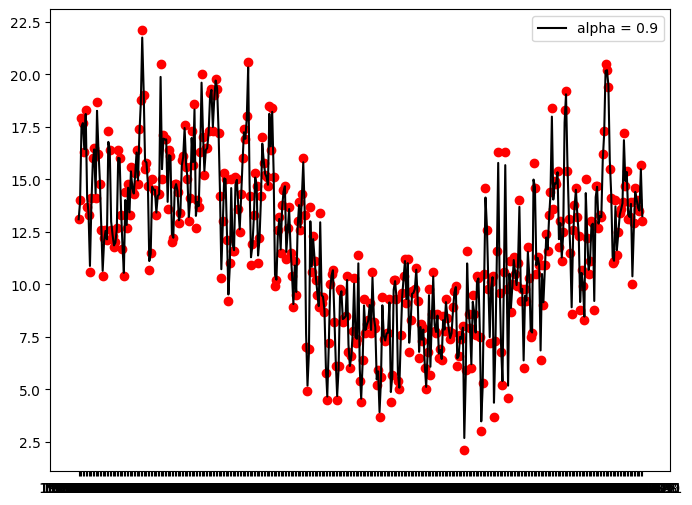

In [47]:
plt.figure(figsize = (8,6))
plt.scatter(df.Date, df.Temp, color = 'red')
plt.plot(df.Date, x1, color ='k', label = 'alpha = 0.9')
plt.legend()

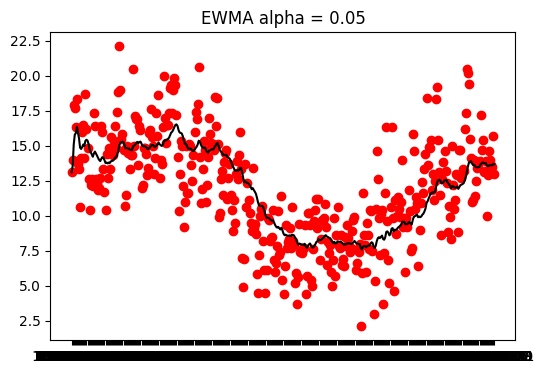

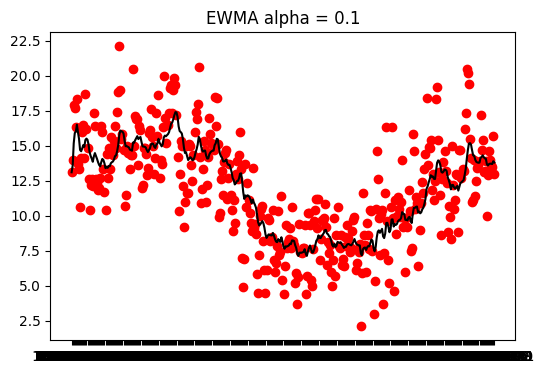

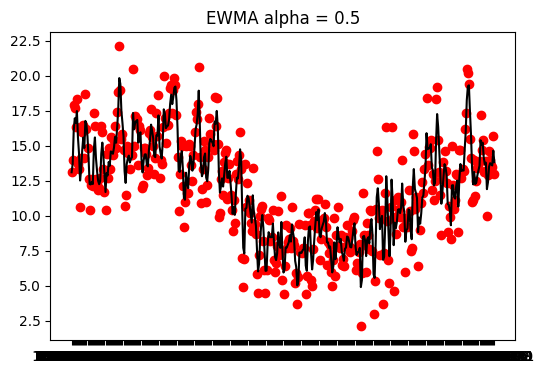

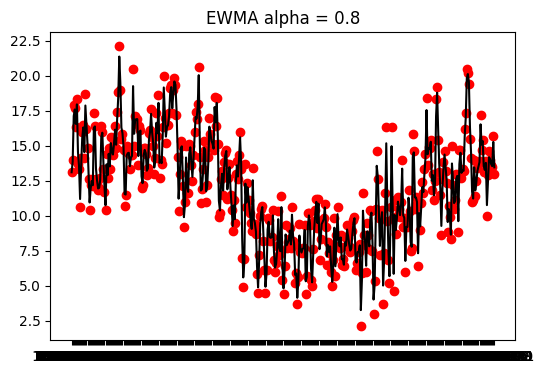

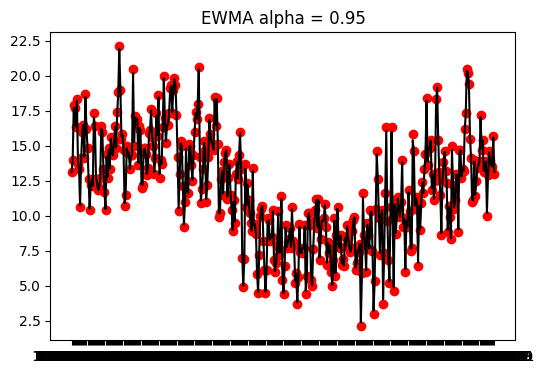

In [48]:
# Making graph for multiple alpha

test = [0.05, 0.1, 0.5, 0.8, 0.95]
for i in range(len(test)):
  plt.figure(figsize = (6, 4))
  ema = df.Temp.ewm(alpha = test[i]).mean()
  plt.scatter(df.Date, df.Temp, color ='r')
  plt.plot(df.Date, ema, color = 'k')
  plt.title(f'EWMA alpha = {test[i]}')
  plt.show()